class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)[source]

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier

In [4]:
df = pd.read_csv("D:\MIT ADT\Third Year - Sem 2\ML LAB\Assgin 6 - Decision Tree\\autism_screening.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\MIT ADT\\Third Year - Sem 2\\ML LAB\\Assgin 6 - Decision Tree\\autism_screening.csv'

In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [ ]:
df.isna().sum()


A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [ ]:
df = df.replace('?', np.nan)

In [ ]:
df.isin(['?']).sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [ ]:
df.isna().sum()


A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

In [ ]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2.0,18 and more,NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7.0,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3.0,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,NaN,no,no,Russia,no,7.0,18 and more,NaN,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6.0,18 and more,Self,NO


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
df['age'] = imputer.fit_transform(df[['age']]).ravel()
df['ethnicity'] = imputer.fit_transform(df[['ethnicity']]).ravel()
df['relation'] = imputer.fit_transform(df[['relation']]).ravel()

In [ ]:
df.isna().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'A1_Score'),
  Text(1, 0, 'A2_Score'),
  Text(2, 0, 'A3_Score'),
  Text(3, 0, 'A4_Score'),
  Text(4, 0, 'A5_Score'),
  Text(5, 0, 'A6_Score'),
  Text(6, 0, 'A7_Score'),
  Text(7, 0, 'A8_Score'),
  Text(8, 0, 'A9_Score'),
  Text(9, 0, 'A10_Score'),
  Text(10, 0, 'age'),
  Text(11, 0, 'result')])

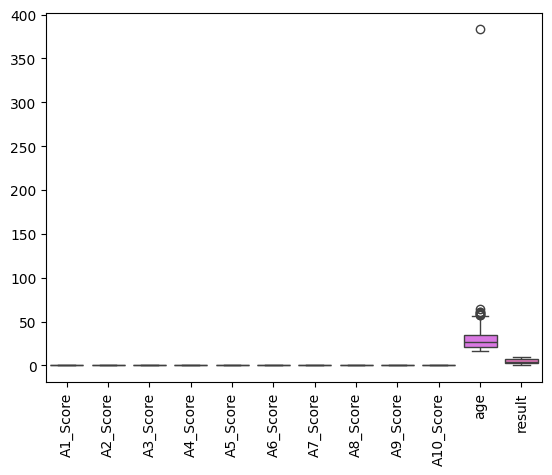

In [ ]:
sns.boxplot(df)

plt.xticks(rotation=90)

In [ ]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1-(1.5*IQR)
upper_bound = Q3+(1.5*IQR)

df = df[df["age"]<=upper_bound]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'A1_Score'),
  Text(1, 0, 'A2_Score'),
  Text(2, 0, 'A3_Score'),
  Text(3, 0, 'A4_Score'),
  Text(4, 0, 'A5_Score'),
  Text(5, 0, 'A6_Score'),
  Text(6, 0, 'A7_Score'),
  Text(7, 0, 'A8_Score'),
  Text(8, 0, 'A9_Score'),
  Text(9, 0, 'A10_Score'),
  Text(10, 0, 'age'),
  Text(11, 0, 'result')])

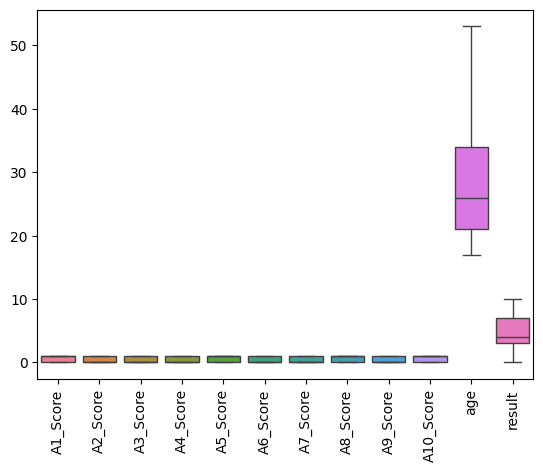

In [ ]:
sns.boxplot(df)

plt.xticks(rotation=90)

In [ ]:
df.columns.values

array(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype=object)

In [ ]:
labels=df['Class/ASD'].unique().tolist()
labels

['NO', 'YES']

In [ ]:
col_names = ['gender', 'austim', 'contry_of_res','used_app_before','age_desc', 'age_desc', 'ethnicity','relation', 'jundice','Class/ASD' ]

lbl_enc = OrdinalEncoder()
for i in col_names:
    df[i] = lbl_enc.fit_transform(df[[i]])

In [ ]:
df.head(20)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,0.0,9.0,0.0,0.0,63.0,0.0,6.0,0.0,4.0,0.0
1,1,1,0,1,0,0,0,1,0,1,...,1.0,3.0,0.0,1.0,13.0,0.0,5.0,0.0,4.0,0.0
2,1,1,0,1,1,0,1,1,1,1,...,1.0,3.0,1.0,1.0,55.0,0.0,8.0,0.0,2.0,1.0
3,1,1,0,1,0,0,1,1,0,1,...,0.0,9.0,0.0,1.0,63.0,0.0,6.0,0.0,4.0,0.0
4,1,0,0,0,0,0,0,1,0,0,...,0.0,9.0,0.0,0.0,22.0,0.0,2.0,0.0,4.0,0.0
5,1,1,1,1,1,0,1,1,1,1,...,1.0,5.0,1.0,0.0,63.0,0.0,9.0,0.0,4.0,1.0
6,0,1,0,0,0,0,0,1,0,0,...,0.0,1.0,0.0,0.0,63.0,0.0,2.0,0.0,4.0,0.0
8,1,1,0,0,1,0,0,1,1,1,...,1.0,9.0,0.0,0.0,63.0,0.0,6.0,0.0,4.0,0.0
9,1,1,1,1,0,1,1,1,1,0,...,1.0,0.0,1.0,1.0,9.0,0.0,8.0,0.0,0.0,1.0
10,1,1,1,1,1,1,1,1,1,1,...,1.0,9.0,0.0,0.0,63.0,0.0,10.0,0.0,3.0,1.0


In [ ]:
# labels=df['Class/ASD'].unique().tolist()
# labels

In [ ]:
X = df.drop("Class/ASD", axis=1)
y = df['Class/ASD']

In [ ]:
df.corr()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
A1_Score,1.000000,0.004984,0.076751,0.118994,0.165989,0.106592,0.212785,0.156850,0.137956,0.110649,...,-0.069148,0.050733,-0.024586,0.091231,0.015319,-0.040654,0.393576,NaN,0.015196,0.293734
A2_Score,0.004984,1.000000,0.217244,0.162360,0.147018,0.171173,-0.051622,0.040985,0.195129,0.059587,...,-0.049371,0.126341,0.105800,0.067644,0.138175,-0.009445,0.383773,NaN,-0.037321,0.303555
A3_Score,0.076751,0.217244,1.000000,0.414296,0.270040,0.262514,0.079008,0.022488,0.314221,0.172243,...,-0.008340,0.109394,0.056467,0.111653,0.042152,0.057582,0.555770,NaN,0.039904,0.442877
A4_Score,0.118994,0.162360,0.414296,1.000000,0.312108,0.296689,0.153749,0.005744,0.327173,0.215233,...,-0.060659,0.141510,0.069601,0.186297,0.036844,0.024577,0.590176,NaN,-0.001411,0.472834
A5_Score,0.165989,0.147018,0.270040,0.312108,1.000000,0.386015,0.228512,0.102419,0.392156,0.258771,...,-0.038129,0.010671,0.022634,0.089771,-0.026314,-0.000778,0.637032,NaN,0.038151,0.531395
A6_Score,0.106592,0.171173,0.262514,0.296689,0.386015,1.000000,0.168992,0.109721,0.473507,0.290304,...,-0.093303,0.100452,0.068337,0.103918,-0.026443,0.090190,0.625069,NaN,-0.085697,0.581464
A7_Score,0.212785,-0.051622,0.079008,0.153749,0.228512,0.168992,1.000000,0.091659,0.180485,0.235253,...,0.061974,-0.001188,0.019604,-0.012414,-0.026189,-0.023001,0.447863,NaN,0.021793,0.347100
A8_Score,0.156850,0.040985,0.022488,0.005744,0.102419,0.109721,0.091659,1.000000,0.111823,0.100837,...,0.062197,-0.034275,0.010849,0.036240,-0.035113,-0.043811,0.332892,NaN,0.044719,0.247520
A9_Score,0.137956,0.195129,0.314221,0.327173,0.392156,0.473507,0.180485,0.111823,1.000000,0.274221,...,-0.002284,0.071901,0.046397,0.159100,-0.086492,0.050781,0.656617,NaN,-0.046814,0.631436
A10_Score,0.110649,0.059587,0.172243,0.215233,0.258771,0.290304,0.235253,0.100837,0.274221,1.000000,...,-0.058624,0.063644,0.042978,0.113314,0.019054,-0.043377,0.530284,NaN,0.025578,0.380570


In [ ]:
from sklearn.feature_selection import mutual_info_classif

mic = mutual_info_classif(X,y)
mic

array([0.05606626, 0.01284231, 0.09914888, 0.12318655, 0.17877799,
       0.16483519, 0.0898205 , 0.0583742 , 0.21151768, 0.14207761,
       0.02852108, 0.        , 0.05534973, 0.        , 0.00293629,
       0.08968916, 0.        , 0.5792637 , 0.03060468, 0.00745336])

In [ ]:
mic = pd.Series(mic)
mic.index = X.columns
mic.sort_values(ascending=False)

result             0.579264
A9_Score           0.211518
A5_Score           0.178778
A6_Score           0.164835
A10_Score          0.142078
A4_Score           0.123187
A3_Score           0.099149
A7_Score           0.089821
contry_of_res      0.089689
A8_Score           0.058374
A1_Score           0.056066
ethnicity          0.055350
age_desc           0.030605
age                0.028521
A2_Score           0.012842
relation           0.007453
austim             0.002936
jundice            0.000000
used_app_before    0.000000
gender             0.000000
dtype: float64

In [ ]:
X = X.drop(['gender', 'age_desc'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
#Scale the Data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xtrain_std = scaler.fit_transform(X_train)
Xtest_std = scaler.transform(X_test)


In [ ]:
entropy_clf = DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=42)

entropy_clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [ ]:
print('Training Accuracy:', entropy_clf.score(X_train,y_train))
print('Test Accuracy:', entropy_clf.score(X_test,y_test))

Training Accuracy: 1.0
Test Accuracy: 1.0


In [ ]:
entropy_clf.fit(Xtrain_std, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [43]:
print('Training Accuracy scale:', entropy_clf.score(Xtrain_std,y_train))
print('Test Accuracy scale:', entropy_clf.score(Xtest_std,y_test))

Training Accuracy scale: 1.0
Test Accuracy scale: 1.0


Training Accuracy: 0.2788671023965142
Test Accuracy: 0.29955947136563876


c:\Users\nilesh\anaconda3\envs\mllab\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\nilesh\anaconda3\envs\mllab\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


[Text(0.5, 0.75, 'x[16] <= 6.5\nentropy = 0.819\nsamples = 459\nvalue = [342, 117]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 342\nvalue = [342, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 117\nvalue = [0, 117]')]

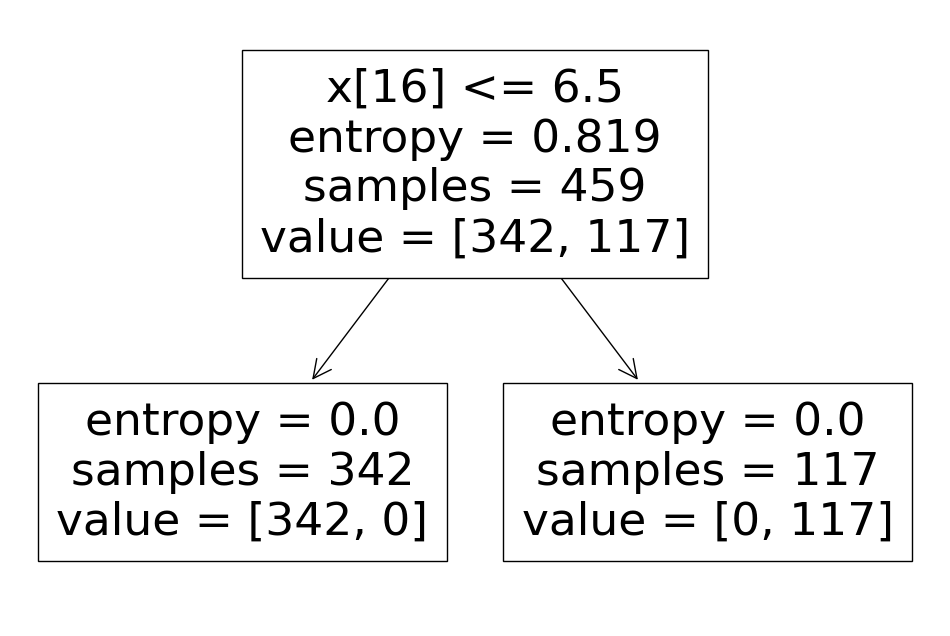

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(entropy_clf.fit(X_train, y_train)) 